In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler
from tensorflow import keras


In [2]:
df = pd.read_csv('jaringan.csv', delimiter=";")
df

,No.,Time,Source,Destination,Protocol,Length,Info
0,1,0.000000,10.10.1.198,172.217.194.95,TLSv1.2,64468,Ignored Unknown Record
1,2,0.000588,10.10.1.198,172.217.194.95,TLSv1.2,64468,Ignored Unknown Record
2,3,0.000745,10.10.1.198,172.217.194.95,TLSv1.2,64468,Ignored Unknown Record
3,4,0.001275,10.10.1.198,172.217.194.95,TLSv1.2,64468,Ignored Unknown Record
4,5,0.002002,10.10.1.198,172.217.194.95,TLSv1.2,64468,Ignored Unknown Record
...,...,...,...,...,...,...,...
236552,236553,37.646.274,10.10.1.198,172.217.194.95,TLSv1.2,64468,"Application Data, Application Data, Applicatio..."
236553,236554,37.646.324,172.217.194.95,10.10.1.198,TCP,96,[TCP Dup ACK 236551#2] 443 > 59620 [ACK] Seq...
236554,236555,37.646.324,172.217.194.95,10.10.1.198,TCP,96,[TCP Dup ACK 236551#3] 443 > 59620 [ACK] Seq...
236555,236556,37.646.350,172.217.194.95,10.10.1.198,TCP,96,443 > 59620 [ACK] Seq=25612 Ack=441356129 Wi...


In [3]:
df.head()

,No.,Time,Source,Destination,Protocol,Length,Info
0,1,0.000000,10.10.1.198,172.217.194.95,TLSv1.2,64468,Ignored Unknown Record
1,2,0.000588,10.10.1.198,172.217.194.95,TLSv1.2,64468,Ignored Unknown Record
2,3,0.000745,10.10.1.198,172.217.194.95,TLSv1.2,64468,Ignored Unknown Record
3,4,0.001275,10.10.1.198,172.217.194.95,TLSv1.2,64468,Ignored Unknown Record
4,5,0.002002,10.10.1.198,172.217.194.95,TLSv1.2,64468,Ignored Unknown Record


In [4]:
df.tail()

,No.,Time,Source,Destination,Protocol,Length,Info
236552,236553,37.646.274,10.10.1.198,172.217.194.95,TLSv1.2,64468,"Application Data, Application Data, Applicatio..."
236553,236554,37.646.324,172.217.194.95,10.10.1.198,TCP,96,[TCP Dup ACK 236551#2] 443 > 59620 [ACK] Seq...
236554,236555,37.646.324,172.217.194.95,10.10.1.198,TCP,96,[TCP Dup ACK 236551#3] 443 > 59620 [ACK] Seq...
236555,236556,37.646.350,172.217.194.95,10.10.1.198,TCP,96,443 > 59620 [ACK] Seq=25612 Ack=441356129 Wi...
236556,236557,37.646.350,172.217.194.95,10.10.1.198,TCP,96,[TCP Dup ACK 236556#1] 443 > 59620 [ACK] Seq...


In [5]:
print(df.isnull().sum())

No.              0
Time             0
Source           0
Destination    253
Protocol         0
Length           0
Info             0
dtype: int64


In [6]:
df = df.dropna()

In [7]:
df.duplicated().sum()

0

In [8]:
df.reset_index(drop=True, inplace=True)


In [9]:
df

,No.,Time,Source,Destination,Protocol,Length,Info
0,1,0.000000,10.10.1.198,172.217.194.95,TLSv1.2,64468,Ignored Unknown Record
1,2,0.000588,10.10.1.198,172.217.194.95,TLSv1.2,64468,Ignored Unknown Record
2,3,0.000745,10.10.1.198,172.217.194.95,TLSv1.2,64468,Ignored Unknown Record
3,4,0.001275,10.10.1.198,172.217.194.95,TLSv1.2,64468,Ignored Unknown Record
4,5,0.002002,10.10.1.198,172.217.194.95,TLSv1.2,64468,Ignored Unknown Record
...,...,...,...,...,...,...,...
236299,236553,37.646.274,10.10.1.198,172.217.194.95,TLSv1.2,64468,"Application Data, Application Data, Applicatio..."
236300,236554,37.646.324,172.217.194.95,10.10.1.198,TCP,96,[TCP Dup ACK 236551#2] 443 > 59620 [ACK] Seq...
236301,236555,37.646.324,172.217.194.95,10.10.1.198,TCP,96,[TCP Dup ACK 236551#3] 443 > 59620 [ACK] Seq...
236302,236556,37.646.350,172.217.194.95,10.10.1.198,TCP,96,443 > 59620 [ACK] Seq=25612 Ack=441356129 Wi...


Exploraty Data Analysis

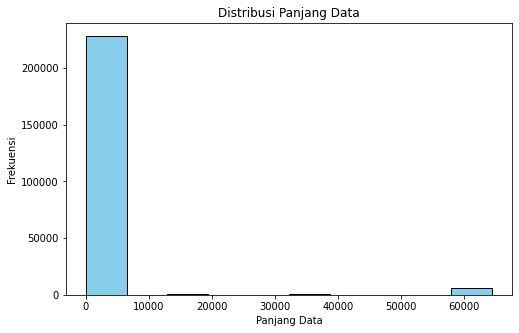

In [10]:
plt.figure(figsize=(8, 5))
plt.hist(df['Length'], bins=10, color='skyblue', edgecolor='black')
plt.title('Distribusi Panjang Data')
plt.xlabel('Panjang Data')
plt.ylabel('Frekuensi')
plt.show()

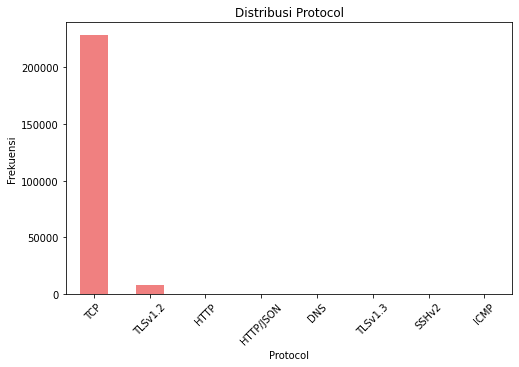

In [11]:
# Visualisasi 2: Distribusi Protocol
plt.figure(figsize=(8, 5))
protocol_counts = df['Protocol'].value_counts()
protocol_counts.plot(kind='bar', color='lightcoral')
plt.title('Distribusi Protocol')
plt.xlabel('Protocol')
plt.ylabel('Frekuensi')
plt.xticks(rotation=45)
plt.show()


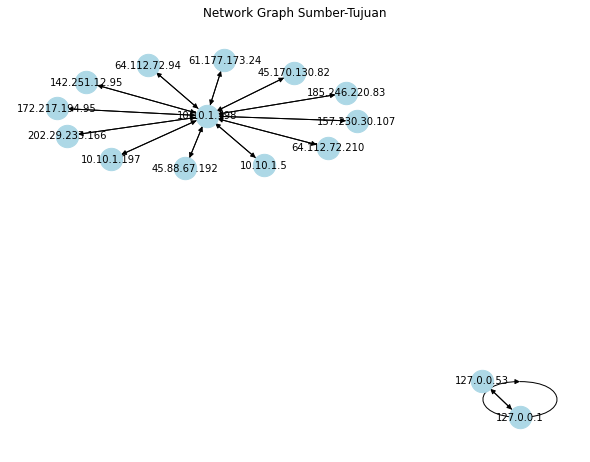

In [12]:
# Visualisasi 4: Network Graph Sumber-Tujuan
import networkx as nx
G = nx.DiGraph()
G.add_edges_from(df[['Source', 'Destination']].itertuples(index=False))
plt.figure(figsize=(8, 6))
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_size=500, node_color='lightblue', font_size=10)
plt.title('Network Graph Sumber-Tujuan')
plt.show()

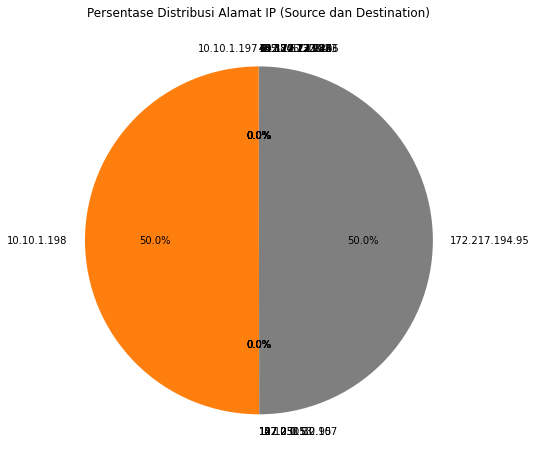

In [13]:
import matplotlib.pyplot as plt
# Menghitung frekuensi alamat IP Source
source_counts = df['Source'].value_counts()

# Menghitung frekuensi alamat IP Destination
destination_counts = df['Destination'].value_counts()

# Menggabungkan data alamat IP Source dan Destination
ip_counts = source_counts.combine(destination_counts, max, fill_value=0)
# 'max' digunakan untuk mengambil nilai maksimum dari dua kolom
# Menghitung persentase dari frekuensi alamat IP
ip_counts_percentage = ip_counts / ip_counts.sum() * 100

# Plotting pie chart
plt.figure(figsize=(8, 8))
ip_counts_percentage.plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title('Persentase Distribusi Alamat IP (Source dan Destination)')
plt.ylabel('')  # Menghapus label sumbu Y
plt.show()


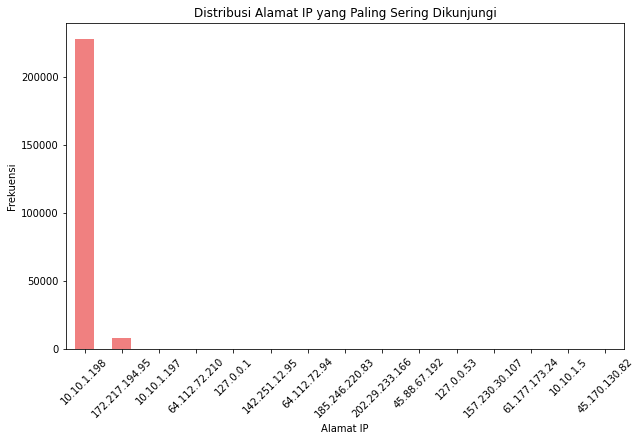

In [14]:
# Menghitung frekuensi alamat IP Destination
destination_counts = df['Destination'].value_counts()

# Menampilkan bar chart distribusi alamat IP yang paling sering dikunjungi
plt.figure(figsize=(10, 6))
destination_counts.plot(kind='bar', color='lightcoral')
plt.title('Distribusi Alamat IP yang Paling Sering Dikunjungi')
plt.xlabel('Alamat IP')
plt.ylabel('Frekuensi')
plt.xticks(rotation=45)
plt.show()

Label Encoding

In [15]:
df = df.apply(LabelEncoder().fit_transform)
df

,No.,Time,Source,Destination,Protocol,Length,Info
0,0,0,1,7,6,207,64354
1,1,1,1,7,6,207,64354
2,2,2,1,7,6,207,64354
3,3,3,1,7,6,207,64354
4,4,4,1,7,6,207,64354
...,...,...,...,...,...,...,...
236299,236299,62522,1,7,6,207,64343
236300,236300,62523,7,1,5,10,169506
236301,236301,62523,7,1,5,10,169507
236302,236302,62524,7,1,5,10,40884


In [16]:
X=df.drop('Protocol',axis=1)
y=df['Protocol']

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
model = RandomForestClassifier(n_estimators=100,random_state=42)

In [19]:
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [20]:
y_pred = model.predict(X_test)

In [21]:
from sklearn.metrics import classification_report, accuracy_score

# Evaluasi model dengan menghitung akurasi atau menggunakan metrik evaluasi
accuracy = accuracy_score(y_test, y_pred.round())
print("Akurasi: {:.2f}%".format(accuracy * 100))


Akurasi: 100.00%


In [22]:
classification_report_result = classification_report(y_test, y_pred.round())
print(classification_report_result)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00        11
           2       1.00      1.00      1.00         7
           5       1.00      1.00      1.00     45649
           6       1.00      1.00      1.00      1590
           7       1.00      1.00      1.00         3

    accuracy                           1.00     47261
   macro avg       1.00      1.00      1.00     47261
weighted avg       1.00      1.00      1.00     47261

